In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

# Task#1

Reading data into a Dataframe


In [2]:

Data =  pd.read_csv(r'C:/Users/Ahmad/Desktop/delta consulting/postpaid_datamart.csv') 

Naming the customer_id column as it was unnamed in the data set

In [3]:
Data.rename(columns = {Data.columns.values[0]: "Customer_id"}, inplace =True)


First 10 fields to see if Data has been uploaded correctly

In [239]:

Data. head(20)

,Customer_id,OG_INTL_FREE_CALL_MOU,OG_ONN_FREE_CALL_MOU,FREE_GPRS_MB,TOTAL_REVENUE,TOTAL_REVENUE_VAS,ROAMING_REV,F_CHURN_3M,MONTH
0,803985,NaN,NaN,29918.731,18.000,9.000,0.0,1,october
1,431536,NaN,NaN,0.013,9.760,4.880,0.0,1,october
2,59287,NaN,NaN,14688.529,36.000,18.000,0.0,1,october
3,19045,NaN,NaN,0.000,24.000,12.000,0.0,1,october
4,453323,1.150,1566.617,8537.953,68.620,34.310,0.0,1,october
5,402038,NaN,NaN,28642.560,36.000,20.500,0.0,1,october
6,199606,NaN,NaN,115315.757,36.000,18.000,0.0,1,october
7,594486,1.950,58.083,5326.087,30.572,15.286,0.0,1,october
8,929452,NaN,43.433,23680.243,40.000,22.170,0.0,1,october
9,359966,NaN,NaN,34371.533,18.000,9.000,0.0,1,october


In [132]:
Data.tail(10)

,Customer_id,OG_INTL_FREE_CALL_MOU,OG_ONN_FREE_CALL_MOU,FREE_GPRS_MB,TOTAL_REVENUE,TOTAL_REVENUE_VAS,ROAMING_REV,F_CHURN_3M,MONTH
16285,1151804,NaN,NaN,0.000,1.816,0.908,0.000,0,october
16286,1410700,NaN,13.833,434.240,20.000,10.000,0.000,0,october
16287,334293,NaN,NaN,156094.528,15.600,15.600,0.000,0,december
16288,70577,NaN,NaN,72069.271,32.000,16.000,0.000,0,october
16289,703538,NaN,NaN,64402.102,21.000,10.500,0.000,0,october
16290,1313491,NaN,NaN,NaN,NaN,NaN,NaN,0,november
16291,866159,NaN,NaN,NaN,NaN,NaN,NaN,0,november
16292,1226727,NaN,NaN,NaN,NaN,NaN,NaN,0,december
16293,1413650,NaN,76.133,19886.945,30.950,31.110,0.718,0,november
16294,1010419,NaN,NaN,0.000,15.000,15.000,0.000,0,december


In [208]:
Data.dtypes # checking for data types # pandas stores string type as object

Customer_id                int64
OG_INTL_FREE_CALL_MOU    float64
OG_ONN_FREE_CALL_MOU     float64
FREE_GPRS_MB             float64
TOTAL_REVENUE            float64
TOTAL_REVENUE_VAS        float64
ROAMING_REV              float64
F_CHURN_3M                 int64
MONTH                     object
dtype: object

No missing row or column

In [130]:
Data.shape

(16295, 9)

In [133]:
Data.isna().sum() #looking at the count of missing data from each feature

Customer_id                  0
OG_INTL_FREE_CALL_MOU    14456
OG_ONN_FREE_CALL_MOU     11084
FREE_GPRS_MB              4818
TOTAL_REVENUE             4788
TOTAL_REVENUE_VAS         4788
ROAMING_REV               4818
F_CHURN_3M                   0
MONTH                        0
dtype: int64

Checking for data uploaded correctly

In [9]:

Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16295 entries, 0 to 16294
Data columns (total 9 columns):
Customer_id              16295 non-null int64
OG_INTL_FREE_CALL_MOU    1839 non-null float64
OG_ONN_FREE_CALL_MOU     5211 non-null float64
FREE_GPRS_MB             11477 non-null float64
TOTAL_REVENUE            11507 non-null float64
TOTAL_REVENUE_VAS        11507 non-null float64
ROAMING_REV              11477 non-null float64
F_CHURN_3M               16295 non-null int64
MONTH                    16295 non-null object
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


# Task#2

Looking for any duplicates in the data

In [4]:
df = Data
dx = df.groupby(['Customer_id','MONTH']).size()


In [5]:
flag = 0
for i in dx.items():
    if i[1] >= 2:
        print(i[i])
        flag = 1
if flag == 0:
    print('No Duplicates in the Data')
        

No Duplicates in the Data


In [7]:
Data.describe()

,Customer_id,OG_INTL_FREE_CALL_MOU,OG_ONN_FREE_CALL_MOU,FREE_GPRS_MB,TOTAL_REVENUE,TOTAL_REVENUE_VAS,ROAMING_REV,F_CHURN_3M
count,1.629500e+04,1839.000000,5211.000000,11477.000000,11507.000000,11507.000000,11477.000000,16295.000000
mean,7.267571e+05,11.494318,146.258864,26077.613154,24.606227,18.813332,0.128289,0.079472
std,4.211731e+05,14.451644,373.598290,37886.822034,34.763445,33.611154,2.207060,0.270483
min,3.000000e+01,0.000000,0.033000,-715.525000,-7.560000,-3.740000,0.000000,0.000000
25%,3.611450e+05,2.058500,16.633500,2797.922000,10.000000,9.000000,0.000000,0.000000
50%,7.222010e+05,6.033000,57.067000,12661.124000,18.000000,13.000000,0.000000,0.000000
75%,1.098936e+06,15.383000,171.316500,36172.417000,30.000000,20.290500,0.000000,0.000000
max,1.456966e+06,144.683000,20969.583000,680517.491000,1226.269000,2405.819000,161.478000,1.000000


Looking at Churned and not churned ratio. Looking for any imbalance as it is going to be our target variable for analysis

In [6]:

Data['F_CHURN_3M'].value_counts()


0    15000
1     1295
Name: F_CHURN_3M, dtype: int64

In [238]:
Data.isna().sum()

Customer_id                  0
OG_INTL_FREE_CALL_MOU    14456
OG_ONN_FREE_CALL_MOU     11084
FREE_GPRS_MB              4818
TOTAL_REVENUE             4788
TOTAL_REVENUE_VAS         4788
ROAMING_REV               4818
F_CHURN_3M                   0
MONTH                        0
dtype: int64

Prepping data for T Test.
Removing rows with missing values from OG INTL and then removing rows where OG ONN has missing values. Storing them in separate
dataframes.
No conclusion could be drawn from T-Test but have been left here for experimental purposes.

In [310]:
df = Data

In [280]:
df = df[['OG_INTL_FREE_CALL_MOU','OG_ONN_FREE_CALL_MOU']]

In [306]:
df1 = df[(df['OG_INTL_FREE_CALL_MOU'].isnull()) & (df['OG_ONN_FREE_CALL_MOU'].isnull())]


In [311]:
df = df.drop(df1.index)

In [313]:
#Removing all null from OG INTL FREE CALL

df1 = df[df['OG_INTL_FREE_CALL_MOU'].isnull()]

In [315]:
#Removing all null from OG ONN FREE CALL

df2 = df[df['OG_ONN_FREE_CALL_MOU'].isnull()]

In [316]:
np.random.seed(12345678)

In [321]:
df2.describe()

,Customer_id,OG_INTL_FREE_CALL_MOU,OG_ONN_FREE_CALL_MOU,FREE_GPRS_MB,TOTAL_REVENUE,TOTAL_REVENUE_VAS,ROAMING_REV,F_CHURN_3M
count,1.140000e+02,114.000000,0.0,114.000000,114.000000,114.000000,114.000000,114.000000
mean,7.085595e+05,17.153640,NaN,5162.810114,20.096132,14.948956,0.083675,0.087719
std,4.291028e+05,14.238545,NaN,7638.379489,22.730956,16.638946,0.598399,0.284135
min,3.655000e+03,0.017000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.465560e+05,5.541500,NaN,1515.370750,10.000000,10.000000,0.000000,0.000000
50%,7.493505e+05,14.066500,NaN,3778.472500,12.440000,10.000000,0.000000,0.000000
75%,1.087174e+06,24.733250,NaN,6314.371500,20.000000,12.518000,0.000000,0.000000
max,1.426167e+06,60.950000,NaN,72750.575000,181.278000,146.009000,4.802000,1.000000


In [322]:
df1.describe()

,Customer_id,OG_INTL_FREE_CALL_MOU,OG_ONN_FREE_CALL_MOU,FREE_GPRS_MB,TOTAL_REVENUE,TOTAL_REVENUE_VAS,ROAMING_REV,F_CHURN_3M
count,3.486000e+03,0.0,3486.000000,3486.000000,3486.000000,3486.000000,3486.000000,3486.000000
mean,8.335482e+05,NaN,144.190243,15580.559408,30.351208,23.053217,0.291621,0.081182
std,4.681084e+05,NaN,420.749576,19468.441217,27.918174,16.772546,3.662103,0.273153
min,3.000000e+01,NaN,0.033000,0.000000,-7.560000,-3.740000,0.000000,0.000000
25%,4.204660e+05,NaN,18.737750,2892.767250,15.000000,10.799000,0.000000,0.000000
50%,9.182630e+05,NaN,61.892000,8222.344500,25.025000,20.000000,0.000000,0.000000
75%,1.289213e+06,NaN,167.745750,20696.875750,35.661250,30.253000,0.000000,0.000000
max,1.456687e+06,NaN,20969.583000,169716.316000,554.276000,277.138000,161.478000,1.000000


In [324]:
ttest = stats.ttest_ind(df2['TOTAL_REVENUE'], df1['TOTAL_REVENUE'], nan_policy = 'omit',equal_var = False)

In [325]:
ttest

Ttest_indResult(statistic=-4.7023772691201, pvalue=6.716105861748312e-06)

As seen so far missing values in FREE CALL VARIABLE are 87% and 67% of the data set. We can assume that data is missing completely at random in both calling variables. 

Looking at correlations with missing values in the Free Calling variables as well as without them.

In [336]:
#correlation with NaN in the data
Data.corr(method ='pearson')

,Customer_id,OG_INTL_FREE_CALL_MOU,OG_ONN_FREE_CALL_MOU,FREE_GPRS_MB,TOTAL_REVENUE,TOTAL_REVENUE_VAS,ROAMING_REV,F_CHURN_3M
Customer_id,1.000000,0.008016,0.032633,-0.065348,0.083055,0.073714,0.027919,-0.019390
OG_INTL_FREE_CALL_MOU,0.008016,1.000000,0.054500,-0.019545,0.175317,0.127350,0.021595,0.026775
OG_ONN_FREE_CALL_MOU,0.032633,0.054500,1.000000,0.149741,0.148646,0.095151,0.071014,-0.024736
FREE_GPRS_MB,-0.065348,-0.019545,0.149741,1.000000,-0.011732,-0.011906,-0.014673,-0.020409
TOTAL_REVENUE,0.083055,0.175317,0.148646,-0.011732,1.000000,0.824667,0.170565,-0.015436
TOTAL_REVENUE_VAS,0.073714,0.127350,0.095151,-0.011906,0.824667,1.000000,0.101654,-0.010382
ROAMING_REV,0.027919,0.021595,0.071014,-0.014673,0.170565,0.101654,1.000000,-0.013458
F_CHURN_3M,-0.019390,0.026775,-0.024736,-0.020409,-0.015436,-0.010382,-0.013458,1.000000


In [ ]:
df4 = Data.fillna(0)


In [341]:
#correlattion after replacing all NaNs with 0
df4.corr(method='pearson')

,Customer_id,OG_INTL_FREE_CALL_MOU,OG_ONN_FREE_CALL_MOU,FREE_GPRS_MB,TOTAL_REVENUE,TOTAL_REVENUE_VAS,ROAMING_REV,F_CHURN_3M
Customer_id,1.000000,0.036693,0.067308,-0.039300,0.079322,0.070880,0.025061,-0.019390
OG_INTL_FREE_CALL_MOU,0.036693,1.000000,0.102053,-0.029106,0.155159,0.162894,0.023070,-0.004216
OG_ONN_FREE_CALL_MOU,0.067308,0.102053,1.000000,0.025297,0.175918,0.149335,0.088151,-0.016020
FREE_GPRS_MB,-0.039300,-0.029106,0.025297,1.000000,0.115880,0.091525,-0.002661,0.029013
TOTAL_REVENUE,0.079322,0.155159,0.175918,0.115880,1.000000,0.840781,0.170429,0.034661
TOTAL_REVENUE_VAS,0.070880,0.162894,0.149335,0.091525,0.840781,1.000000,0.106399,0.029742
ROAMING_REV,0.025061,0.023070,0.088151,-0.002661,0.170429,0.106399,1.000000,-0.008446
F_CHURN_3M,-0.019390,-0.004216,-0.016020,0.029013,0.034661,0.029742,-0.008446,1.000000


We can see above that there's not much change in the correlation with the data with imputing zero in Free calling variables.

Removing data with missing value in Total Revenue as this does not seem to be completely random. Rows missing data for TOTAL REVENUE are also missing data in other variables. Therefore it is a good idea to remove all of these rows.



In [ ]:
df5 = Data.loc[Data['TOTAL_REVENUE'].isnull()]


In [209]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4788 entries, 56 to 16292
Data columns (total 9 columns):
Customer_id              4788 non-null int64
OG_INTL_FREE_CALL_MOU    0 non-null float64
OG_ONN_FREE_CALL_MOU     0 non-null float64
FREE_GPRS_MB             0 non-null float64
TOTAL_REVENUE            0 non-null float64
TOTAL_REVENUE_VAS        0 non-null float64
ROAMING_REV              0 non-null float64
F_CHURN_3M               4788 non-null int64
MONTH                    4788 non-null object
dtypes: float64(6), int64(2), object(1)
memory usage: 374.1+ KB


#we can see above that no column has any value where TOTAL VALUE is missing. 

In [210]:
df5.head(10)

,Customer_id,OG_INTL_FREE_CALL_MOU,OG_ONN_FREE_CALL_MOU,FREE_GPRS_MB,TOTAL_REVENUE,TOTAL_REVENUE_VAS,ROAMING_REV,F_CHURN_3M,MONTH
56,845038,NaN,NaN,NaN,NaN,NaN,NaN,1,october
58,864516,NaN,NaN,NaN,NaN,NaN,NaN,1,october
76,369642,NaN,NaN,NaN,NaN,NaN,NaN,1,october
88,295560,NaN,NaN,NaN,NaN,NaN,NaN,1,october
93,1253216,NaN,NaN,NaN,NaN,NaN,NaN,1,october
116,451019,NaN,NaN,NaN,NaN,NaN,NaN,1,october
131,643879,NaN,NaN,NaN,NaN,NaN,NaN,1,october
137,942736,NaN,NaN,NaN,NaN,NaN,NaN,1,october
141,411699,NaN,NaN,NaN,NaN,NaN,NaN,1,october
152,719889,NaN,NaN,NaN,NaN,NaN,NaN,1,october


 It can bee seen that all variables are missing values if Total Revenue is missing value. Below is a further proof

In [10]:
df5.isna().sum()

Customer_id                 0
OG_INTL_FREE_CALL_MOU    4788
OG_ONN_FREE_CALL_MOU     4788
FREE_GPRS_MB             4788
TOTAL_REVENUE            4788
TOTAL_REVENUE_VAS        4788
ROAMING_REV              4788
F_CHURN_3M                  0
MONTH                       0
dtype: int64

Removing above mentioned values i.e all rows that are missing TOTAL REVENUE data.

In [8]:

cleandata1 = Data.drop(df5.index)

In [9]:
cleandata1.info() # we're left with 11507 rows of data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11507 entries, 0 to 16294
Data columns (total 9 columns):
Customer_id              11507 non-null int64
OG_INTL_FREE_CALL_MOU    1839 non-null float64
OG_ONN_FREE_CALL_MOU     5211 non-null float64
FREE_GPRS_MB             11477 non-null float64
TOTAL_REVENUE            11507 non-null float64
TOTAL_REVENUE_VAS        11507 non-null float64
ROAMING_REV              11477 non-null float64
F_CHURN_3M               11507 non-null int64
MONTH                    11507 non-null object
dtypes: float64(6), int64(2), object(1)
memory usage: 899.0+ KB


In [16]:
cleandata1.isna().sum() # we still have 9668 and 6296 missing values in FREE CALL variable after removing completely empty rows.

Customer_id                 0
OG_INTL_FREE_CALL_MOU    9668
OG_ONN_FREE_CALL_MOU     6296
FREE_GPRS_MB               30
TOTAL_REVENUE               0
TOTAL_REVENUE_VAS           0
ROAMING_REV                30
F_CHURN_3M                  0
MONTH                       0
dtype: int64

Imputing all the missing values with Zero.


In [273]:
cleandata2 = cleandata1.fillna(0)

In [211]:
cleandata2.head()

,Customer_id,OG_INTL_FREE_CALL_MOU,OG_ONN_FREE_CALL_MOU,FREE_GPRS_MB,TOTAL_REVENUE,TOTAL_REVENUE_VAS,ROAMING_REV,F_CHURN_3M,MONTH
0,803985,0.00,0.000,29918.731,18.00,9.00,0.0,1,october
1,431536,0.00,0.000,0.013,9.76,4.88,0.0,1,october
2,59287,0.00,0.000,14688.529,36.00,18.00,0.0,1,october
3,19045,0.00,0.000,0.000,24.00,12.00,0.0,1,october
4,453323,1.15,1566.617,8537.953,68.62,34.31,0.0,1,october


Checking for outliers and distribution in Free GPRS MB variable.

(array([3.119e+03, 9.980e+02, 2.950e+02, 1.030e+02, 4.900e+01, 2.100e+01,
        1.200e+01, 5.000e+00, 8.000e+00, 2.000e+00]),
 array([ 20000.,  58000.,  96000., 134000., 172000., 210000., 248000.,
        286000., 324000., 362000., 400000.]),
 <a list of 1 Patch objects>)

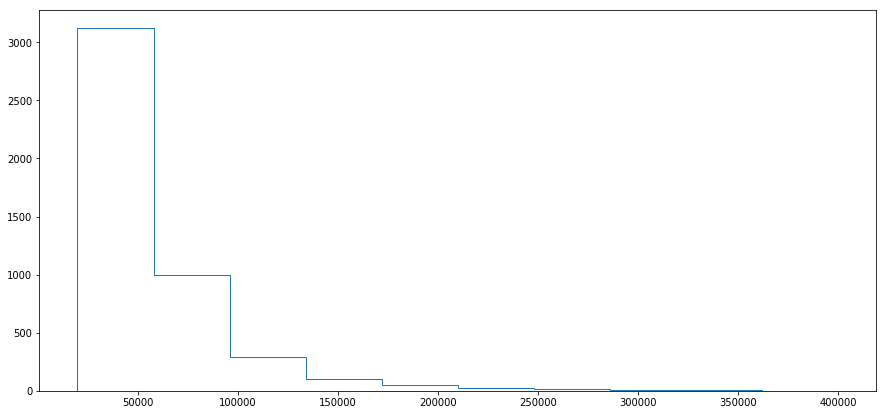

In [412]:
plt.figure(figsize=(15,7))
plt.hist(cleandata2.FREE_GPRS_MB, range = (20000, 400000),histtype='step')

Distribution plot is good place to observe outliers

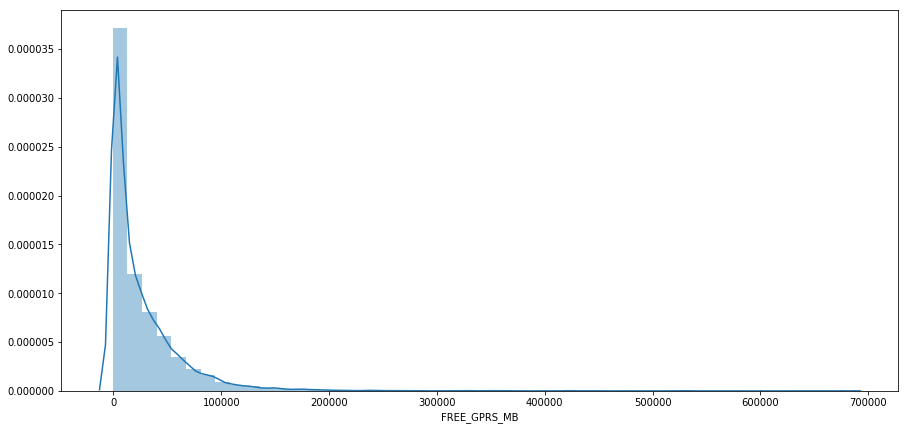

In [411]:
plt.figure(figsize=(15,7))
sns.distplot(cleandata2.FREE_GPRS_MB)

Box plot can help with seeing the outliers more precisely

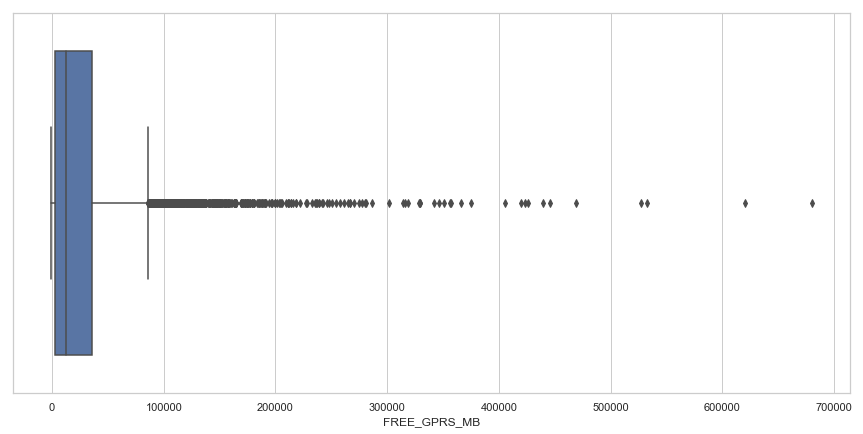

In [453]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
sns.boxplot(cleandata2.FREE_GPRS_MB, whis = 1.5)


In [454]:
np.percentile(cleandata2.FREE_GPRS_MB, [25,50,75])
#IQR= 36136.387 - 2737.93 = 33 399
# whiskers --> 36136+ 33400*1.5 = 86236, 2737- 33400 = -48000 (-30664, 69536)


array([ 2737.928, 12573.776, 36136.387])

Since good amount of data is outlier. In interest of not reducing dataset any further we're going to impute with mean.

Rows to be replaced with mean in the FREE GPRS variable


In [274]:
meanreplace = cleandata2.loc[(cleandata2['FREE_GPRS_MB'] < -48000) | (cleandata2['FREE_GPRS_MB'] > 87000)]
meanreplace.head()

,Customer_id,OG_INTL_FREE_CALL_MOU,OG_ONN_FREE_CALL_MOU,FREE_GPRS_MB,TOTAL_REVENUE,TOTAL_REVENUE_VAS,ROAMING_REV,F_CHURN_3M,MONTH
6,199606,0.000,0.000,115315.757,36.000,18.000,0.0,1,october
15,829169,0.000,0.000,106961.418,36.000,18.000,0.0,1,october
22,715992,0.000,0.000,174910.981,36.000,18.000,0.0,1,october
25,719666,0.000,0.000,106439.822,36.000,18.000,0.0,1,october
57,401970,8.633,329.817,99826.018,101.212,53.406,0.0,1,october


Replacing outliers with Mean of FREE GPRS MB

In [275]:
cleandata2.loc[meanreplace.index,'FRE_GPRS_MB'] = cleandata2['FREE_GPRS_MB'].mean()

BOX PLOT for Total Revenue


[(-50, 1000)]

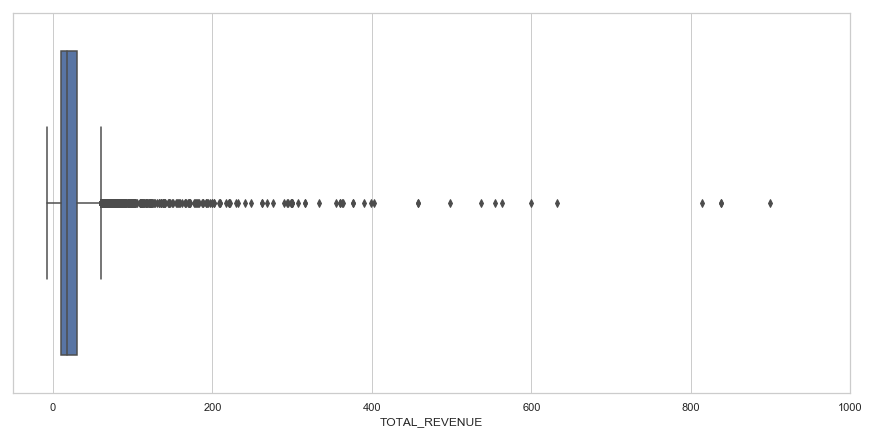

In [445]:

plt.figure(figsize=(15,7))
sns.set(style="whitegrid")
ax = sns.boxplot(cleandata2.TOTAL_REVENUE )
ax.set(xlim=(-50, 1000))

In [449]:
# 25, 50 and 75 percentile measurement
np.percentile(cleandata2.TOTAL_REVENUE, [25,50,75])
#30-10=20*1.5 =30 ---- whisker = -20 to 50

array([10., 18., 30.])

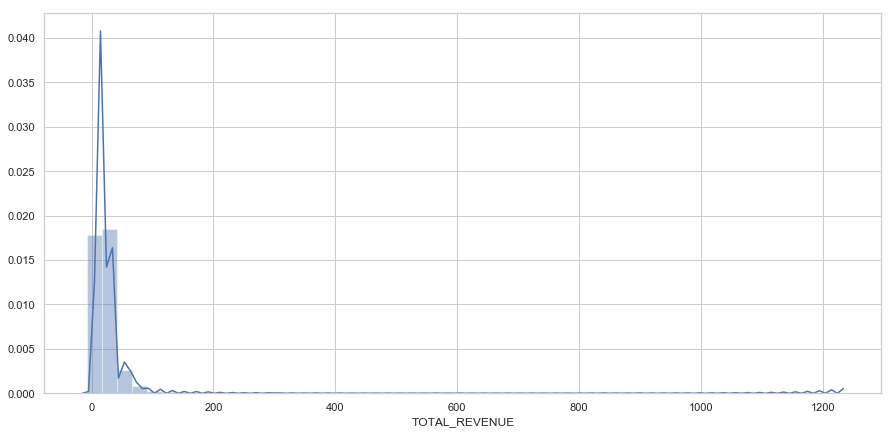

In [495]:
plt.figure(figsize=(15,7))
sns.distplot(cleandata2.TOTAL_REVENUE)

Replace the following rows with mean


In [238]:
avgmeanreplace = cleandata2.loc[(cleandata2['TOTAL_REVENUE'] < -21) | (cleandata2['TOTAL_REVENUE'] > 51)]
avgmeanreplace.head()

,Customer_id,OG_INTL_FREE_CALL_MOU,OG_ONN_FREE_CALL_MOU,FREE_GPRS_MB,TOTAL_REVENUE,TOTAL_REVENUE_VAS,ROAMING_REV,F_CHURN_3M,MONTH
4,453323,1.150,1566.617,8537.953,68.620,34.310,0.0,1,october
14,214782,0.000,0.517,2447.150,60.000,30.000,0.0,1,october
41,1385114,0.000,545.800,2550.523,60.000,33.100,0.0,1,october
57,401970,8.633,329.817,99826.018,101.212,53.406,0.0,1,october
60,1238680,0.000,622.283,29956.688,60.100,33.300,0.0,1,october


Replacing outliers in the Total Revenue with the mean.


In [259]:
cleandata2.loc[avgmeanreplace.index,'TOTAL_REVENUE'] = cleandata2['TOTAL_REVENUE'].mean()

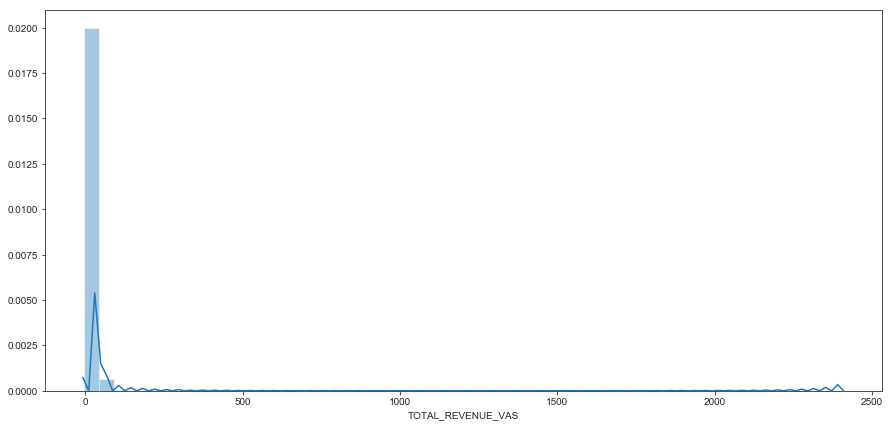

In [266]:
plt.figure(figsize=(15,7))
sns.distplot(cleandata2.TOTAL_REVENUE_VAS)

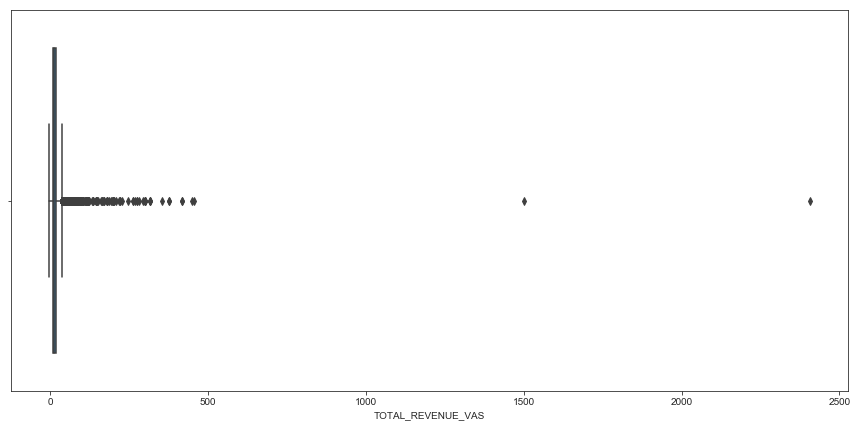

In [267]:
plt.figure(figsize=(15,7))
sns.boxplot(cleandata2.TOTAL_REVENUE_VAS)

In [268]:
np.percentile(cleandata3.TOTAL_REVENUE_VAS, [25,50,75])
# IQR 9 
#Whisker --> 9- 13.5 = -4.5, 18+ 13.5 = 31.5

array([ 9.   , 12.973, 18.   ])

Replacing outliers with mean in Total Revenue VAS.

In [276]:
meanreplacevas = cleandata2.loc[(cleandata3['TOTAL_REVENUE_VAS'] < -5) | (cleandata2['TOTAL_REVENUE'] > 32)]

In [277]:
cleandata2.loc[meanreplacevas.index,'TOTAL_REVENUE_VAS'] = cleandata2['TOTAL_REVENUE_VAS'].mean()

Backing up the cleaned data incase there's a mistake later.


In [17]:
cleandata3 = cleandata2


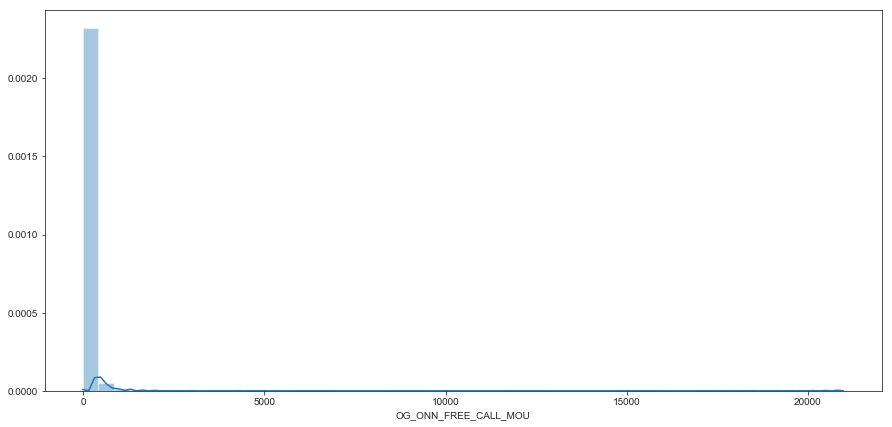

In [278]:
plt.figure(figsize=(15,7))
sns.distplot(cleandata3.OG_ONN_FREE_CALL_MOU)

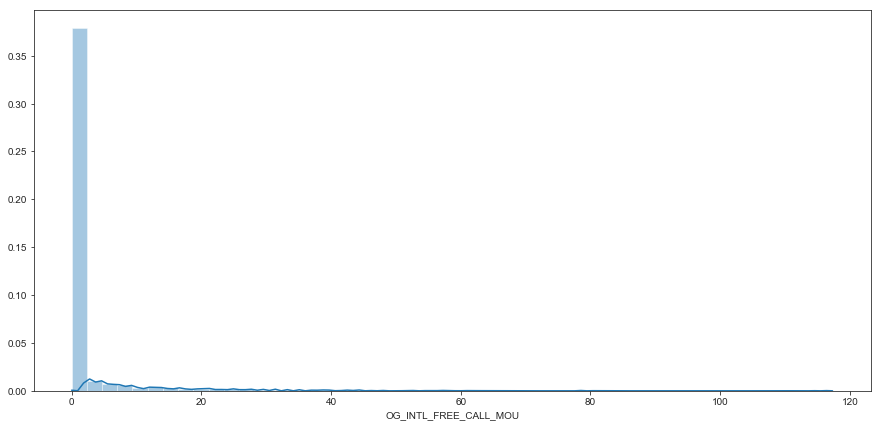

In [279]:
plt.figure(figsize=(15,7))
sns.distplot(cleandata3.OG_INTL_FREE_CALL_MOU)

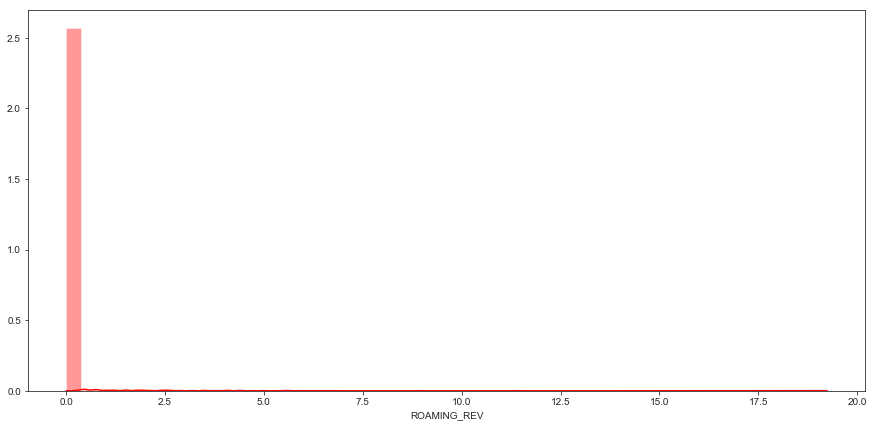

In [280]:
plt.figure(figsize=(15,7))
sns.distplot(cleandata3.ROAMING_REV, color = 'red')

Since majority revenue is 0 and distribution tells us it is not well spread therefore imputing zero won't make any difference.

In [281]:
cleandata3['ROAMING_REV'] = 0  

In [283]:
cleandata3['ROAMING_REV'].describe()

count    9883.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: ROAMING_REV, dtype: float64

(array([8830.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1053.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

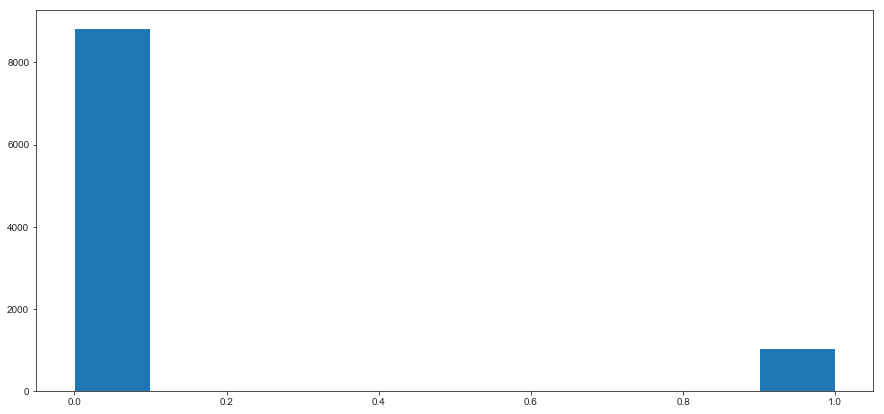

In [284]:
plt.figure(figsize=(15,7))
plt.hist(cleandata3.F_CHURN_3M)

Checking for seasonality

In [285]:
cleandata3['YEAR'] = 2015

In [287]:
cleandata3.index = pd.to_datetime(cleandata3['YEAR'].astype(str)  + cleandata3['MONTH'], format='%Y%B')

In [289]:
cleandata3['monthint'] = pd.DatetimeIndex(cleandata3.index).month

In [290]:
cleandata3.head()

,Customer_id,OG_INTL_FREE_CALL_MOU,OG_ONN_FREE_CALL_MOU,FREE_GPRS_MB,TOTAL_REVENUE,TOTAL_REVENUE_VAS,F_CHURN_3M,MONTH,YEAR,DATE,monthint
2015-10-01,803985,0.00,0.000,29918.731,18.000,9.000,1,october,2015,30,10
2015-10-01,431536,0.00,0.000,0.013,9.760,4.880,1,october,2015,30,10
2015-10-01,19045,0.00,0.000,0.000,24.000,12.000,1,october,2015,30,10
2015-10-01,594486,1.95,58.083,5326.087,30.572,15.286,1,october,2015,30,10
2015-10-01,359966,0.00,0.000,34371.533,18.000,9.000,1,october,2015,30,10


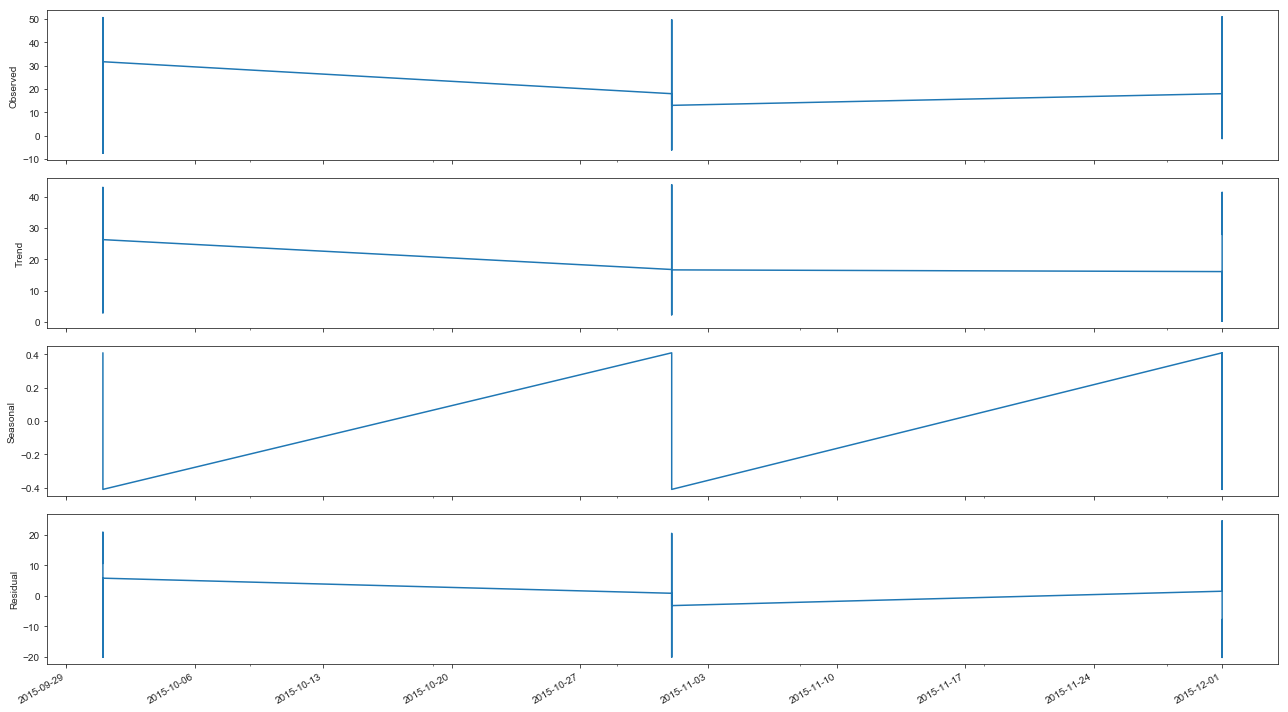

In [291]:
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(cleandata3.TOTAL_REVENUE, model ='additive', freq = 2)
fig = decomposition.plot()
plt.show()

We can see that total revenues hit the minimum in November and then back to being high in december

Below is the seasonality graphs for Churn variable

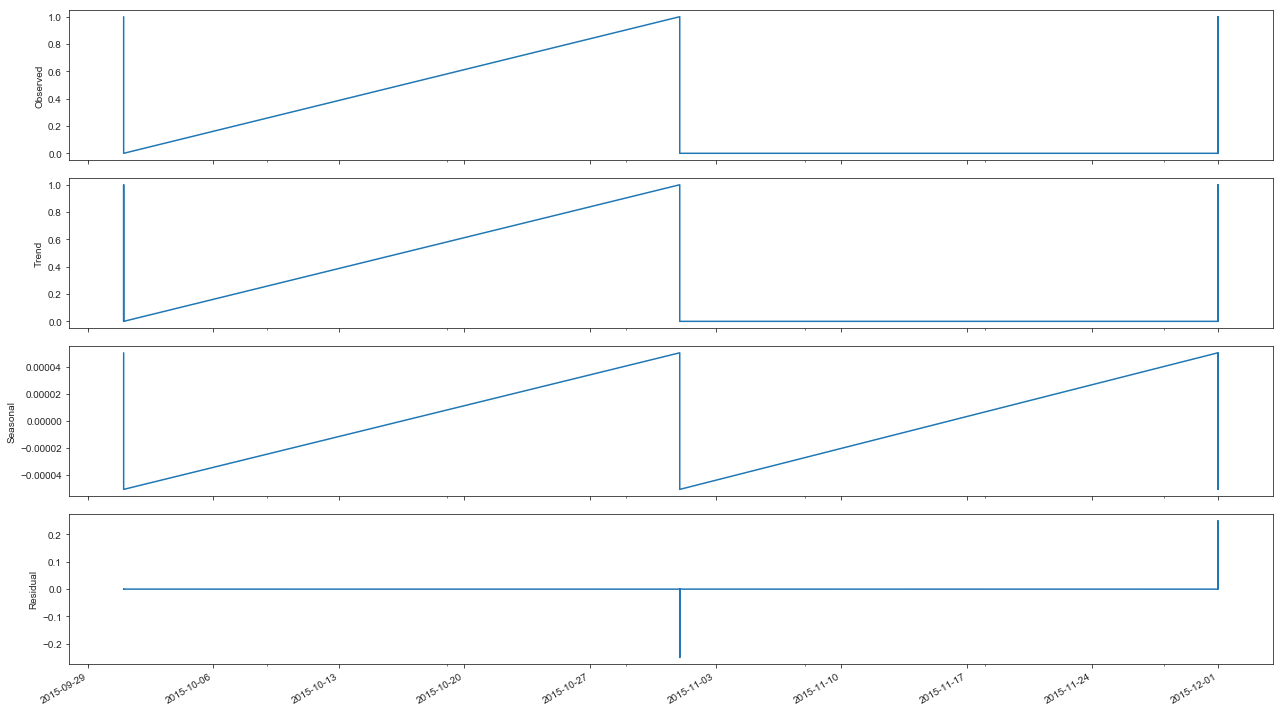

In [339]:
rcParams['figure.figsize'] = 18, 10
decomposition = sm.tsa.seasonal_decompose(cleandata3.F_CHURN_3M, model ='additive', freq = 2)
fig = decomposition.plot()
plt.show()

Churn increases and drops to minimum in November, that means november has had the lowest churn overall as well as december
and october being the highest month of churn

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


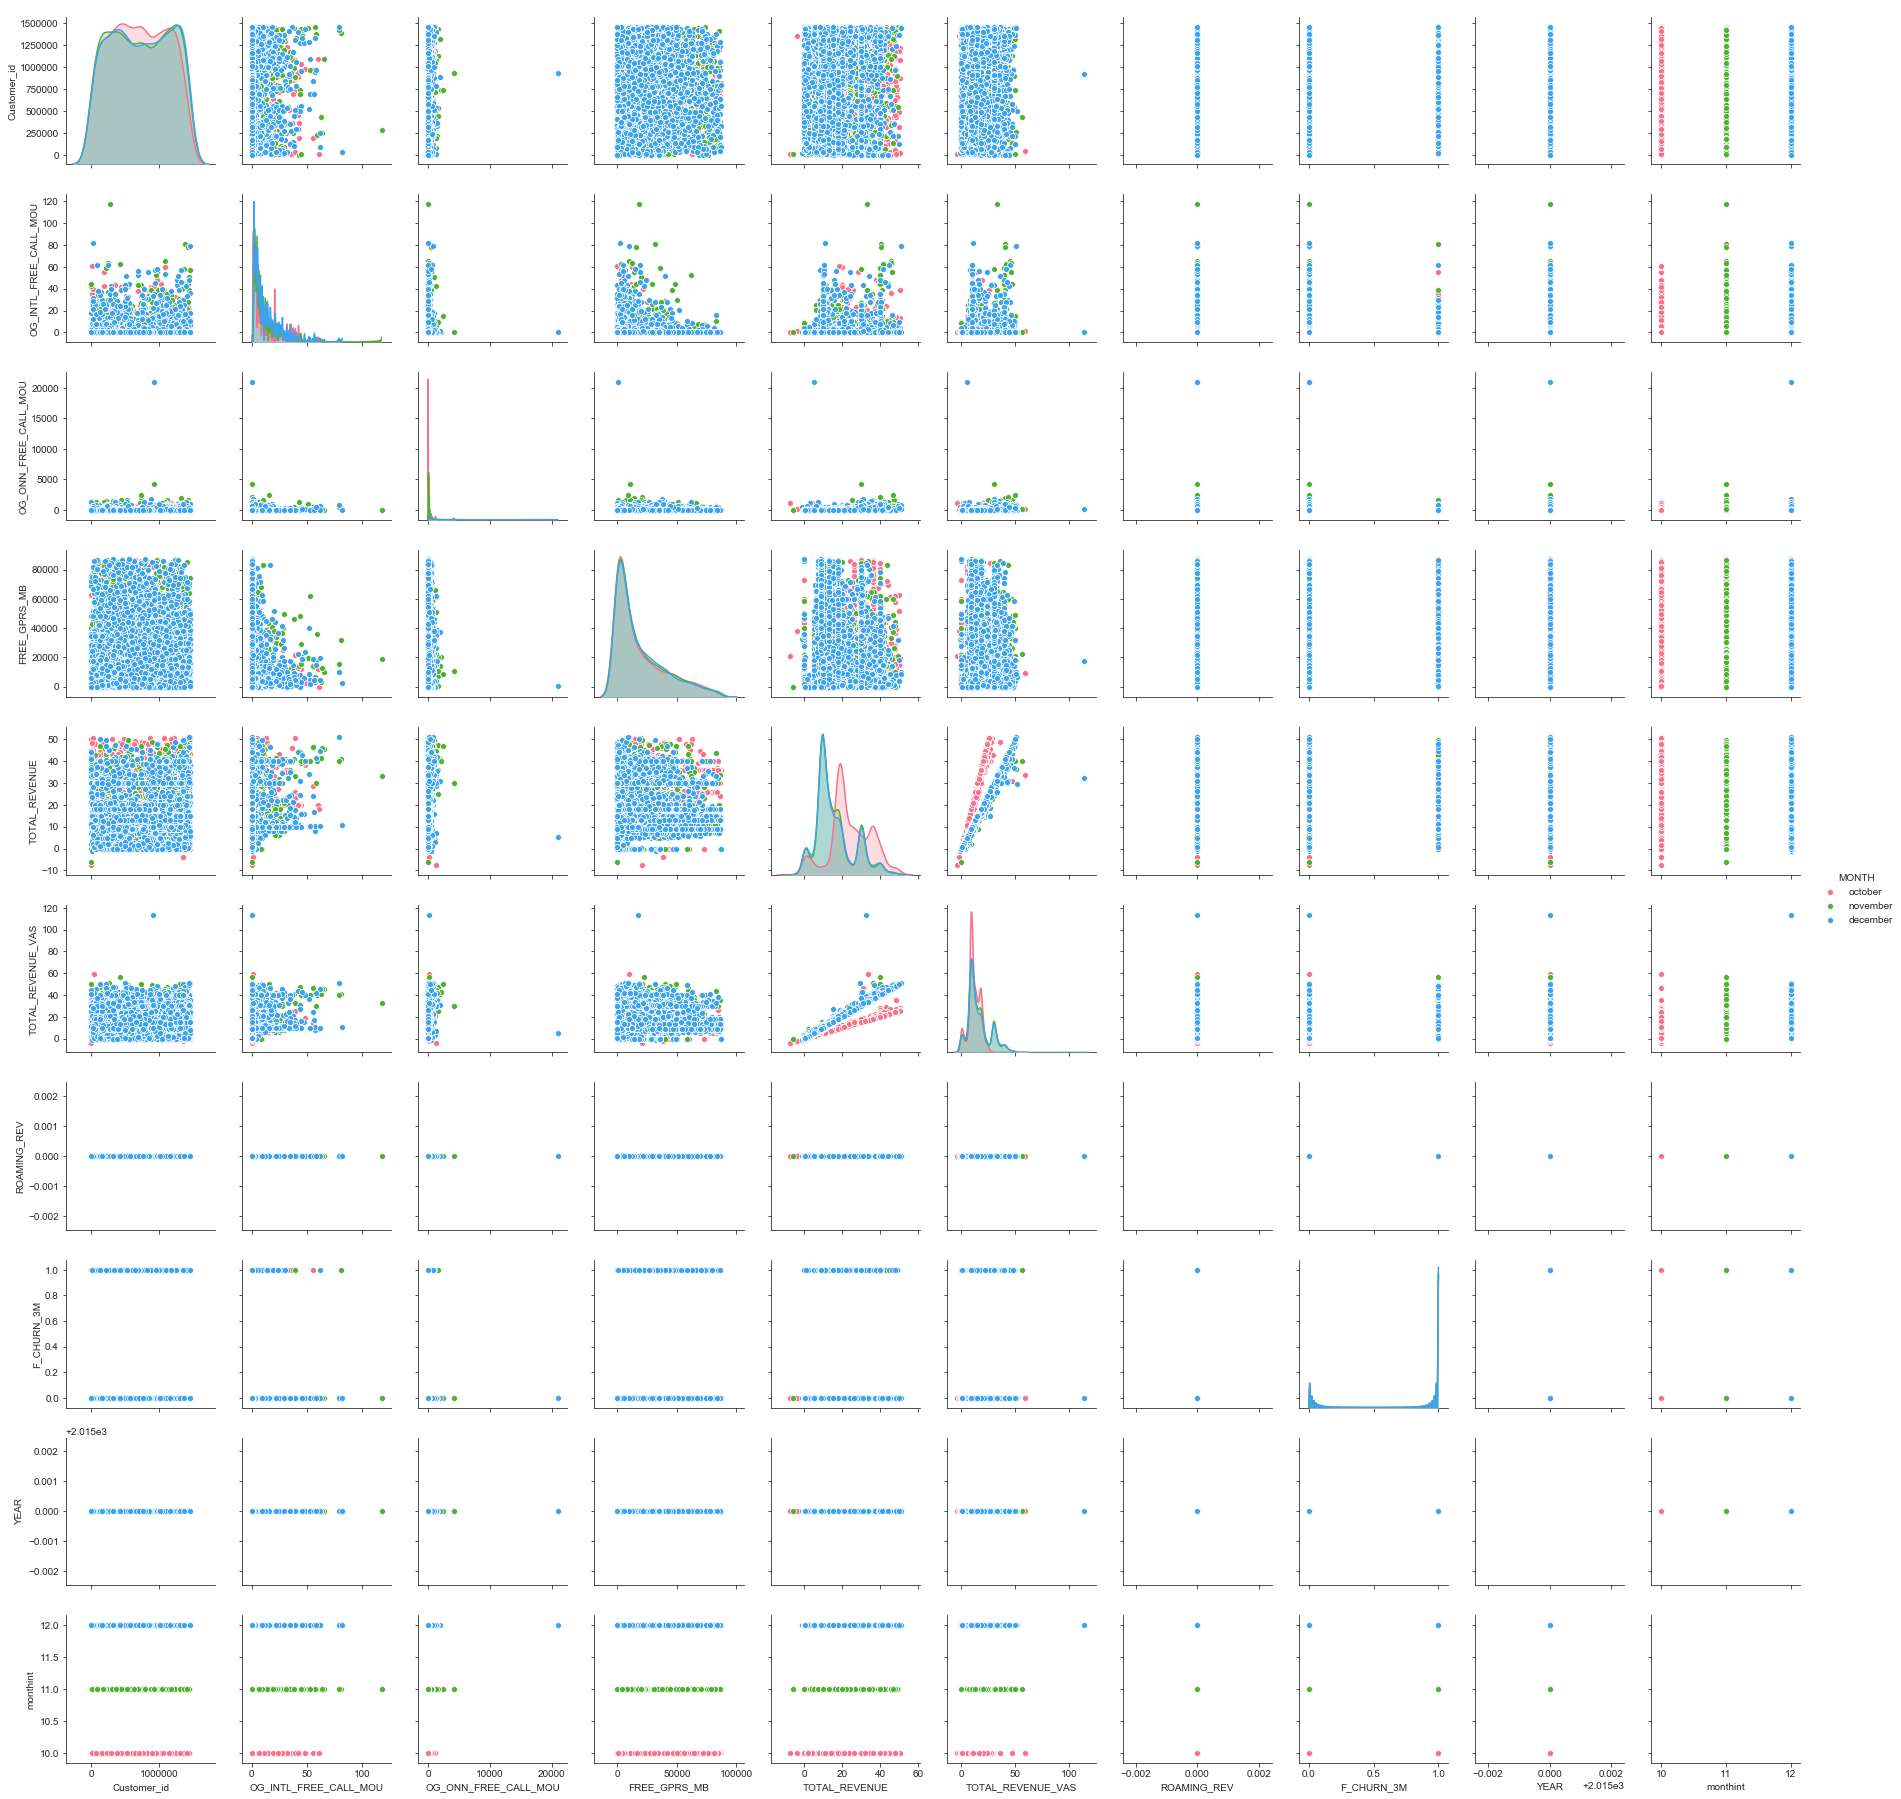

In [292]:
sns.set_style("ticks")
sns.pairplot(cleandata3,hue = 'MONTH',diag_kind = "kde",kind = "scatter",palette = "husl")
plt.show()

Due to weak or no correlation, pairwise analysis gives little information.

Measuring correlations for the Dataset

In [293]:
cleandata3.corr('pearson') 

,Customer_id,OG_INTL_FREE_CALL_MOU,OG_ONN_FREE_CALL_MOU,FREE_GPRS_MB,TOTAL_REVENUE,TOTAL_REVENUE_VAS,ROAMING_REV,F_CHURN_3M,YEAR,monthint
Customer_id,1.000000,0.022709,0.063100,-0.059975,0.093638,0.121307,NaN,-0.027023,NaN,0.028901
OG_INTL_FREE_CALL_MOU,0.022709,1.000000,0.040860,-0.106114,0.070930,0.097559,NaN,-0.020219,NaN,0.039331
OG_ONN_FREE_CALL_MOU,0.063100,0.040860,1.000000,-0.000206,0.174089,0.238538,NaN,-0.030118,NaN,0.063049
FREE_GPRS_MB,-0.059975,-0.106114,-0.000206,1.000000,0.125101,0.123382,NaN,-0.001791,NaN,0.005500
TOTAL_REVENUE,0.093638,0.070930,0.174089,0.125101,1.000000,0.813307,NaN,-0.022551,NaN,-0.299745
TOTAL_REVENUE_VAS,0.121307,0.097559,0.238538,0.123382,0.813307,1.000000,NaN,-0.020096,NaN,0.154244
ROAMING_REV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F_CHURN_3M,-0.027023,-0.020219,-0.030118,-0.001791,-0.022551,-0.020096,NaN,1.000000,NaN,0.005548
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthint,0.028901,0.039331,0.063049,0.005500,-0.299745,0.154244,NaN,0.005548,NaN,1.000000


Removing Roaming Rev because it does not provide any extra information in above anlysis of correlations.

In [294]:
cleandata3.drop(['ROAMING_REV'], axis = 1, inplace = True)

## Churn Analysis

Using variable FRee GPRS and TOTaL revenue because  they had the most correlation. Since we're predicting churners, F_CHURN_3M
has been used due to be the target variable
FREE call were not used because of high density of missing values and No correlation with any other variable

In [295]:
churndata = np.array(cleandata3[['FREE_GPRS_MB','TOTAL_REVENUE',]])
churntarget = np.array(cleandata3['F_CHURN_3M'])

In [296]:
train_feat, test_feat, train_lbl, test_lbl = train_test_split(
   churndata, churntarget, test_size=0.2, random_state=122)

Below class weight has been set to class_weight= balanced. Sklearn will determine the imbalance and act accordingly. There are other ways as well in dealing with the imbalanced class such as using stratify in train test split, but for this analysis this feature of Sklearn provided good enough results.

In [297]:
logisticRegr = LogisticRegression(class_weight = 'balanced')

In [298]:
logisticRegr.fit(train_feat, train_lbl)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [299]:
pred = logisticRegr.predict(test_feat)

Model Evaluation, using accuracy and confusion matrix as our evaluation metrics.

In [300]:
score = logisticRegr.score(test_feat, test_lbl)
print(score)

0.4931714719271624


In [301]:
cm = metrics.confusion_matrix(test_lbl, pred)
print(cm)

[[870 892]
 [110 105]]


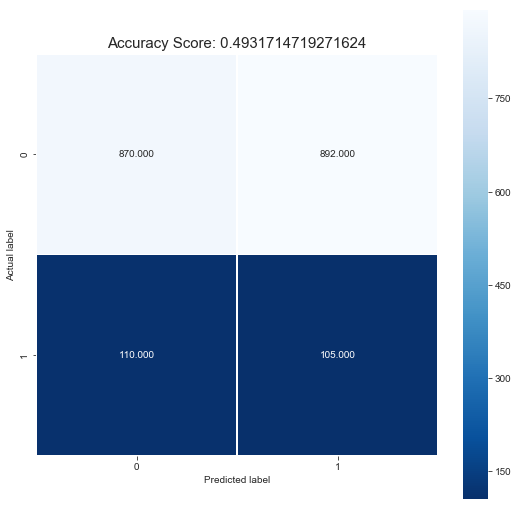

In [302]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

Improving the model: Grid Search

In [335]:
grid={"C":[0.00001,0.0001,0.001,0.01,0.1,1,10], "penalty":["l1","l2"]}

In [336]:
logreg_cv=GridSearchCV(logisticRegr,grid,cv=5)

In [337]:
logreg_cv.fit(train_feat, train_lbl)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [338]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l1'}
accuracy : 0.7783961548191247


Accuracy improved from 49.3% to 77.8% 

Further improving the model by tweaking the solver, default uses lbfgs solver

In [318]:
logisticRegr2 = LogisticRegression(class_weight = 'balanced', C= 0.001, penalty ='l1', solver = 'saga')

In [319]:
logisticRegr2.fit(train_feat, train_lbl)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.001, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='saga', tol=0.0001, verbose=0, warm_start=False)

In [320]:
predtuned = logisticRegr2.predict(test_feat)

In [321]:
score2 = logisticRegr2.score(test_feat, test_lbl)
print(score)

0.8866970156803238


In [324]:
cm = metrics.confusion_matrix(test_lbl, predtuned)
print(cm)

[[1753    9]
 [ 215    0]]


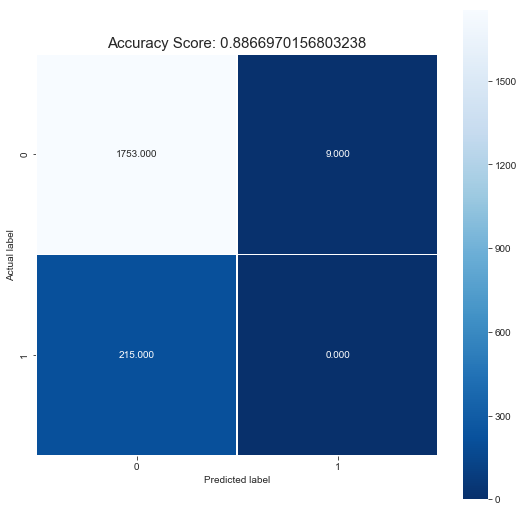

In [325]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title, size = 15);

#Feature engineering - Data is certainly small for october month, probably more balanced data for each of the 3 months could
could be much more helpful.We can use regression to add more data for months with smaller data ratio in the dataset.

Months could be used as categorical feature, this can provide more details into user patterns for each month.

#Data sources -Missing tarrif plan variable and pay as you go variable to understand total revenue better can certainly help
in understanding and prediction accuracy could be improved.

#more information on how data was collected and why it is missing from the company data could be helpful in undertanding various correlations and more accurate imputing techniques can be adopted.

#User location can also be a factor. Data on location can improve the model. People might move around and change their service provider due to quality variation.

#Corporate connections vs individual vs family plan information can be used for a better analysis.